## Importing the required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

from warnings import filterwarnings
filterwarnings('ignore')

## Reading the data

#### Control Group

In [9]:
control = pd.read_csv('data/control_group.csv')
control.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


The control group dataset has **only one column with values separated by semicolons**. This column needs to be split into separate columns.

In [11]:
control_col_list = control.columns[0].split(';')

control_data = list(control['Campaign Name;Date;Spend [USD];# of Impressions;Reach;\
# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].apply(lambda x:x.split(';')))

In [12]:
control_df = pd.DataFrame(control_data, columns=control_col_list)

control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [13]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     object
 3   # of Impressions     30 non-null     object
 4   Reach                30 non-null     object
 5   # of Website Clicks  30 non-null     object
 6   # of Searches        30 non-null     object
 7   # of View Content    30 non-null     object
 8   # of Add to Cart     30 non-null     object
 9   # of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


* The control group dataset has **30 rows and 10 columns**.
* All columns are of object data type, and they need to be converted to their corresponding data types based on the values.
* Some columns contain **empty strings as entries**, which makes them appear non-null. This needs to be corrected.

In [15]:
num_cols_as_cat = ['Spend [USD]','# of Impressions','Reach','# of Website Clicks','# of Searches','# of View Content','# of Add to Cart','# of Purchase']

control_df['Date'] = pd.to_datetime(control_df['Date'], format='%d.%m.%Y')

for i in num_cols_as_cat:
    control_df[i] = control_df[i].apply(lambda x: int(x) if x != '' else 0)

control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-05,1835,0,0,0,0,0,0,0


In [16]:
control_df.duplicated().sum()

0

There are **no duplicate rows** in the control group dataset.

In [18]:
control_df.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2288.433333,105907.766667,85883.433333,5143.433333,2147.266667,1879.000000,1256.666667,505.366667
min,2019-08-01 00:00:00,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-08-08 06:00:00,1945.500000,91211.500000,69708.500000,4042.250000,1451.500000,1174.000000,913.500000,367.500000
50%,2019-08-15 12:00:00,2299.500000,112368.000000,91418.000000,5082.500000,2340.000000,1979.500000,1279.000000,500.000000
75%,2019-08-22 18:00:00,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,2019-08-30 00:00:00,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000
std,NaN,367.334451,29228.406061,26894.781829,1981.299011,942.718883,842.421428,465.435749,205.342352


* The control campaign dataset contains **30 days of campaign data** across key performance metrics such as spend, impressions, reach, website clicks, searches, content views, add-to-cart actions, and purchases.
* All metrics are recorded daily from **August 1 to August 30, 2019**.
* **# of Website Clicks, # of View Content, # of Add to Cart, # of Purchase** show a typical drop-off pattern as users progress through the funnel.
* **Zero values** indicate tracking gaps or non-engagement on certain days.


#### Test Group

In [21]:
test = pd.read_csv('data/test_group.csv')
test.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Test Campaign;1.08.2019;3008;39550;35820;3038;...
1,Test Campaign;2.08.2019;2542;100719;91236;4657...
2,Test Campaign;3.08.2019;2365;70263;45198;7885;...
3,Test Campaign;4.08.2019;2710;78451;25937;4216;...
4,Test Campaign;5.08.2019;2297;114295;95138;5863...


In [22]:
test_col_list = test.columns[0].split(';')

test_data = list(test['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;\
# of View Content;# of Add to Cart;# of Purchase'].apply(lambda x:x.split(';')))

In [23]:
test_df = pd.DataFrame(test_data, columns=test_col_list)

test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     object
 3   # of Impressions     30 non-null     object
 4   Reach                30 non-null     object
 5   # of Website Clicks  30 non-null     object
 6   # of Searches        30 non-null     object
 7   # of View Content    30 non-null     object
 8   # of Add to Cart     30 non-null     object
 9   # of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [25]:
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d.%m.%Y')

for i in num_cols_as_cat:
    test_df[i]=test_df[i].apply(lambda x:int(x) if x != '' else 0)

test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [26]:
test_df.duplicated().sum()

0

The test group dataset also contains **no duplicate rows**.

In [28]:
test_df.describe()

,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000
std,NaN,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745


* The test campaign dataset also contains **30 days of campaign data**, spanning from **August 1 to August 30, 2019**, across key performance metrics.
* Unlike the control group, **no zero values** are observed — suggesting consistent ad delivery and tracking.

## Exploratory Data Analysis

In [31]:
def comparison_viz(col):
    avg_control = control_df[col].mean()
    avg_test = test_df[col].mean()

    total_control = control_df[col].sum()
    total_test = test_df[col].sum()

    x = ['control group', 'test group']
    y = [total_control, total_test]

    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

    ax1 = sns.lineplot(data=control_df, x='Date', y=col, label='control group', ax=ax1)
    ax1.axhline(y=avg_control, color='steelblue', ls='--', label='control group avg')

    ax1 = sns.lineplot(data=test_df, x='Date', y=col, label='test group', ax=ax1)
    ax1.axhline(y=avg_test, color='orange', ls='--', label='test group avg')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles=handles, labels=labels)

    ax1.set_title(f'Daily {col} during the Campaign')
   
    ax1.set_xticklabels(ax1.get_xticklabels())
    ax1.tick_params(axis='x', rotation=90)
    
    ax2 = sns.barplot(x=x,y=y,palette=['steelblue', 'orange'])

    for container in ax2.containers:
        ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    
    ax2.set_ylabel(f'Total {col}')
    ax2.set_title(f'Total {col} during the Campaign')
    
    plt.tight_layout()
    plt.show()

The **daily spend** reflects how much the marketing company allocates to the advertising campaign each day.

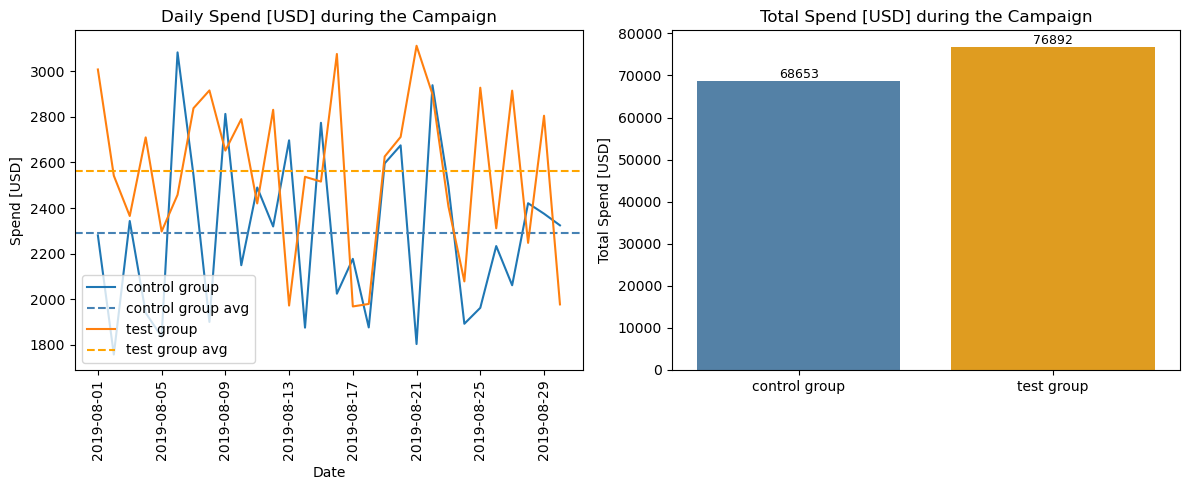

In [33]:
comparison_viz('Spend [USD]')

* Both groups exhibit considerable daily fluctuations in their spending, indicating that the spend was not constant each day.
* The test group shows more instances of higher daily expenditures.
* Towards the end of the campaign (after August 25th), both groups show a decreasing trend in daily spend, though the test group maintains a higher level.
* The test group campaign had a significantly higher total spend during the campaign, reaching 76,892 USD. The control group campaign spend was less in total, with 68,653 USD.
* This indicates that the test group campaign spend was approximately 11.99% more than the control group over the entire campaign period.

An **impression** is recorded each time an advertisement is displayed to a user.

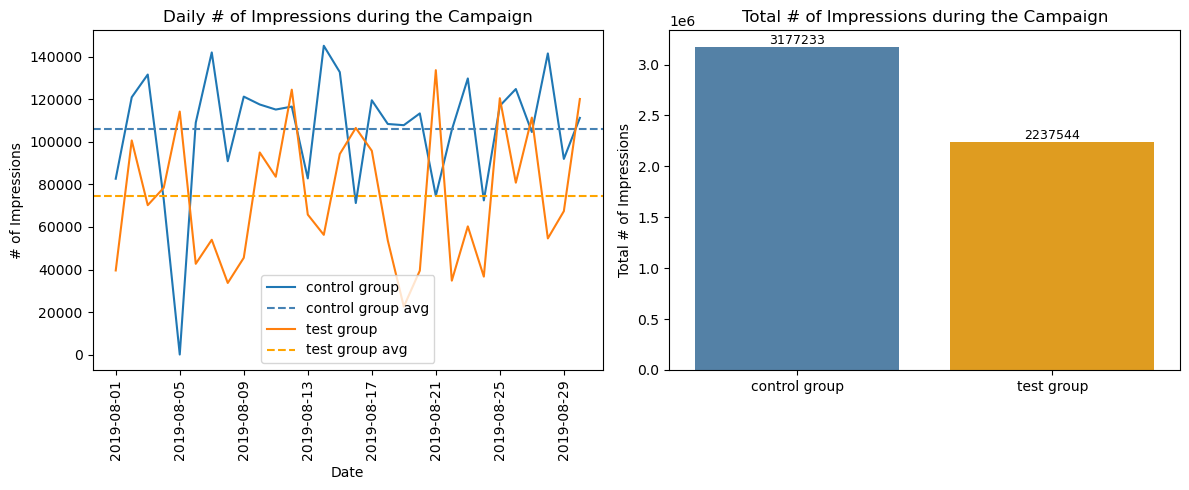

In [36]:
comparison_viz('# of Impressions')

* The control group's average appears to be around 105,000 impressions/day, while the test group's average is around 75,000 impressions/day.
* The control group's daily impressions frequently reached much higher peaks (e.g., above 140,000 impressions) compared to the test group, which rarely exceeded 100,000 impressions on a daily basis.
* The control group generally maintained a higher baseline of daily impressions throughout the campaign.
* The control group received a significantly higher total number of impressions during the campaign, reaching 3,177,233.
* The test group received substantially fewer impressions, with a total of 2,237,544.
* This indicates that the control group had approximately 42.00% more impressions than the test group over the entire campaign period.

Despite the test group incurring an 11.99% higher total campaign spend (76,892 USD) compared to the control group (68,653 USD), the control group generated a substantially greater volume of impressions, approximately 42.00% more (3,177,233 vs. 2,237,544). In essence, the control group's ads were more efficient in delivering impressions for the money spent.

**Reach** represents the total number of unique users who were exposed to the advertisement during the campaign.

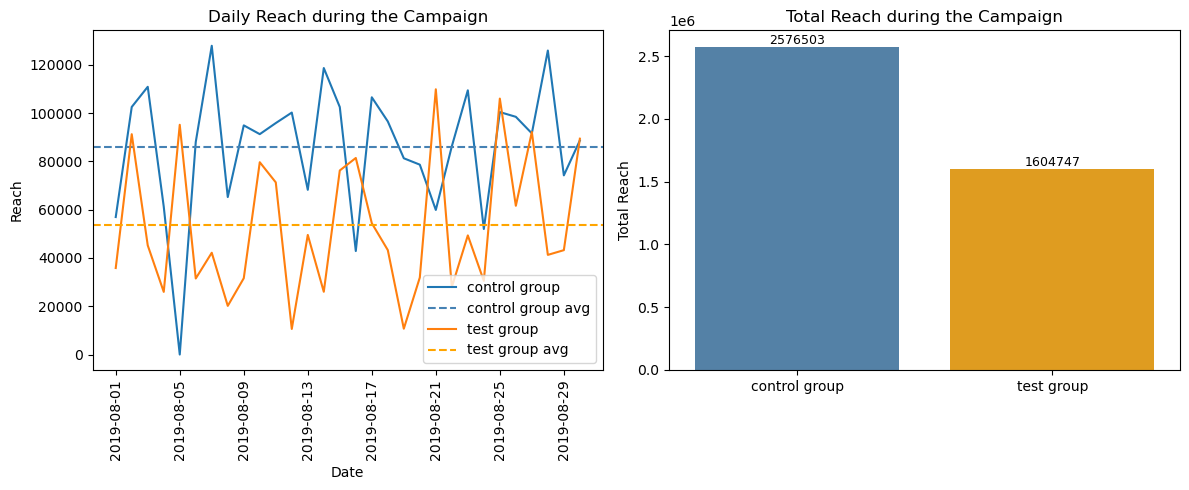

In [39]:
comparison_viz('Reach')

* The control group's daily reach frequently reached much higher peaks (e.g., exceeding 120,000) compared to the test group, which rarely surpassed 100,000 on a daily basis.
* The control group generally maintained a higher baseline of daily reach throughout the campaign.
* The control group achieved a significantly higher total reach during the campaign, reaching 2,576,503 unique users.
* The test group had a substantially lower total reach, with 1,604,747 unique users.
* This means the control group reached approximately 60.55% more unique users than the test group over the entire campaign period.
  
Consistent with the "Impressions" data, the control group significantly outperformed the test group in terms of total and average daily reach. Despite the test group's higher total spend, its ability to reach unique users was substantially lower than that of the control group. 

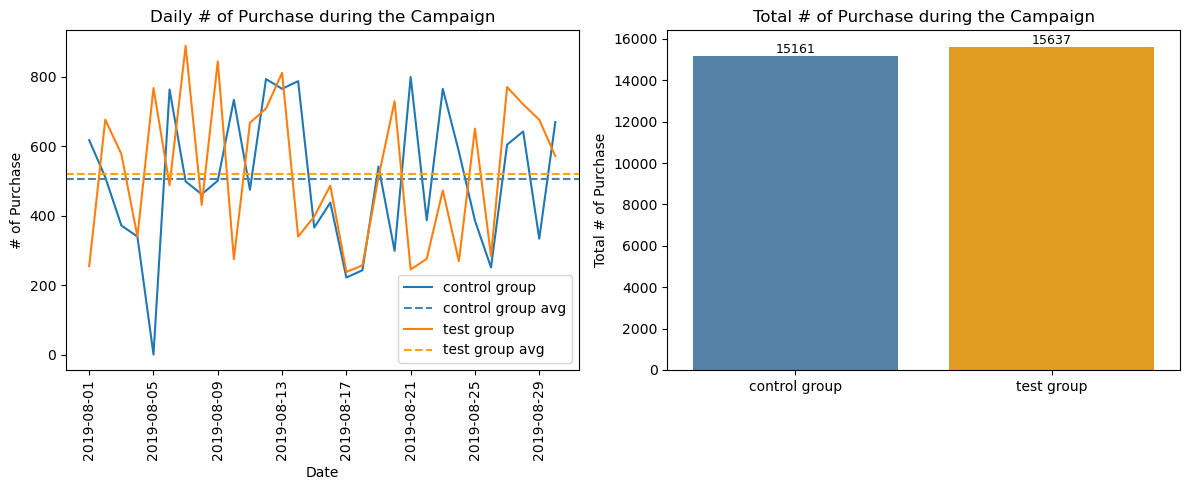

In [41]:
comparison_viz('# of Purchase')

* The overall daily trend for both groups seems to be relatively stable across the month, without a consistent upward or downward slope.
* There are periods where one group clearly outperforms the other on a given day, but overall, the daily patterns are quite volatile for both.
* The test group recorded a slightly higher total number of purchases during the campaign, with 15,637.
* The control group had a very similar total number of purchases, with 15,161.
* This indicates that the test group generated approximately 3.14% more purchases than the control group over the entire campaign period.

In contrast to Impressions and Reach, the test group slightly outperformed the control group in terms of the total number of purchases. While the difference is not as dramatic as seen in other metrics (only about a 3% increase for the test group), it suggests that despite achieving fewer impressions and less reach, the test group's activities led to a marginally higher conversion in actual purchases. This hints at potential differences in the quality or targeting of the impressions/reach that the test group achieved, or a more effective call to action.

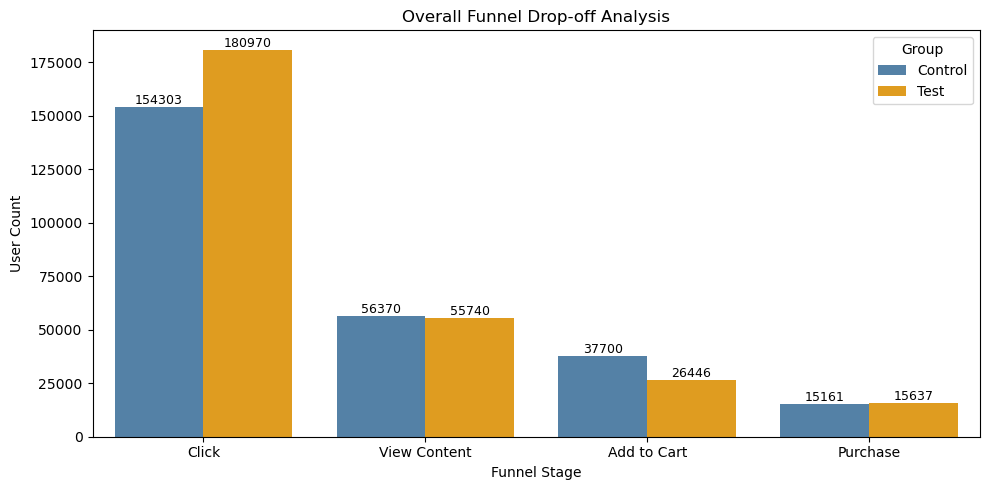

In [43]:
stages = ['Click', 'View Content', 'Add to Cart', 'Purchase']

control_values = []
test_values = []

for i in ['# of Website Clicks', '# of View Content', '# of Add to Cart', '# of Purchase']:
    control_values.append(control_df[i].sum())
    test_values.append(test_df[i].sum())

df = pd.DataFrame({
    'Stage': stages * 2,
    'Group': ['Control'] * 4 + ['Test'] * 4,
    'Count': control_values + test_values
})

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x='Stage', y='Count', hue='Group', palette=['steelblue', 'orange'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.title('Overall Funnel Drop-off Analysis')
plt.ylabel('User Count')
plt.xlabel('Funnel Stage')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

Here are the key insights from this funnel drop-off analysis:

**1. Initial Stage (Click):**
* The test group started with a significantly higher number of clicks, reaching 180,970.
* The control group had fewer initial clicks, at 154,303.
* This indicates the test group attracted approximately 17.28% more initial clicks.
  
**2. Mid-Funnel (View Content):**
* As users progressed to "View Content," the numbers for both groups became very similar.
* The control group had 56,370 users view content.
* The test group had 55,740 users view content.
* This indicates a significant drop-off efficiency difference from "Click" to "View Content." The test group, despite starting with more clicks, lost a larger proportion of users at this initial conversion step, resulting in almost equal numbers at "View Content."

**3. Mid-to-Lower Funnel (Add to Cart):**
* At the "Add to Cart" stage, the control group significantly outperformed the test group.
* The control group had 37,700 users add to cart.
* The test group dropped substantially to 26,446 users adding to cart.
* This marks a critical drop-off point for the test group, where its performance falls notably behind the control group.

**4. Final Stage (Purchase):**
* Reversing the trend from "Add to Cart," the test group recorded a slightly higher number of purchases.
* The test group completed 15,637 purchases.
* The control group completed 15,161 purchases.
* This final stage result aligns with the previous "Total # of Purchase" chart, showing the test group achieving about 3.14% more purchases.

This analysis suggests that while the test group might be better at attracting initial clicks, the control group is more effective at guiding users through the initial and middle stages of the purchase funnel, leading to a more consistent flow until the final purchase, where the test group shows slightly higher efficiency in converting "Add to Cart" to "Purchase."

## Treating Outliers

In [46]:
num_cols = control_df.select_dtypes(include=np.number).columns.to_list()
num_cols

['Spend [USD]',
 '# of Impressions',
 'Reach',
 '# of Website Clicks',
 '# of Searches',
 '# of View Content',
 '# of Add to Cart',
 '# of Purchase']

To prevent extreme values from skewing my analysis, I will use the Interquartile Range (IQR) method to identify and remove outliers from both the control and test datasets.

#### Control Group

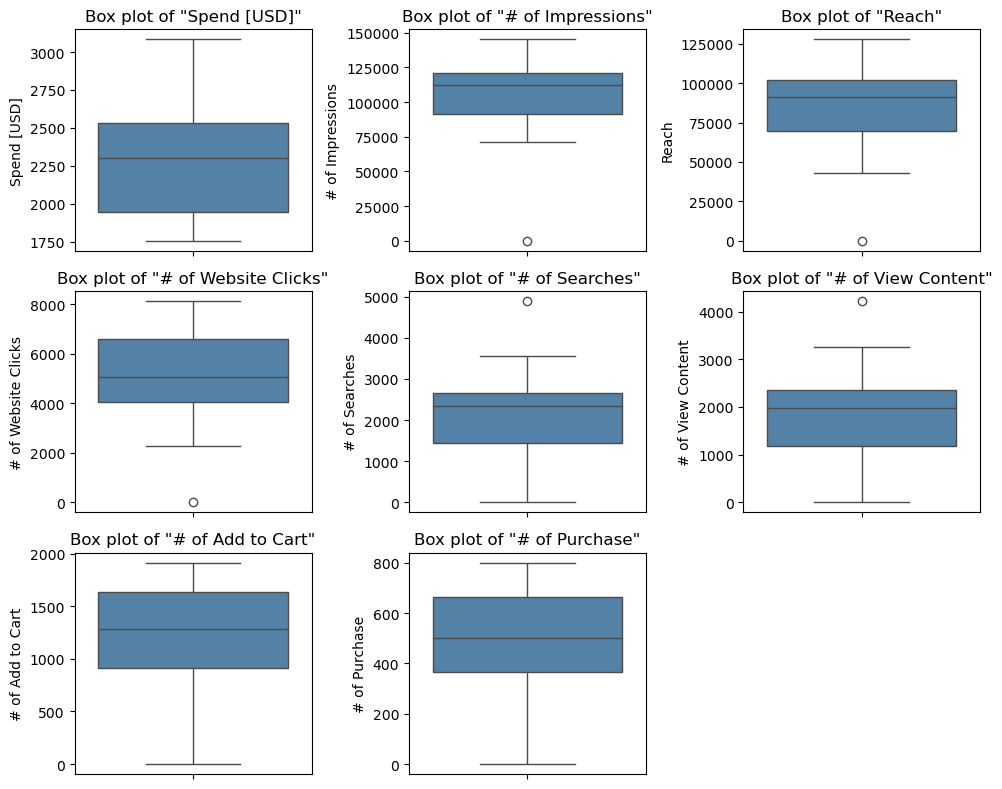

In [49]:
plt.figure(figsize=(10,8))
t = 1
for i in num_cols:
    plt.subplot(3,3,t) 
    sns.boxplot(control_df[i], color='steelblue')
    plt.title(f'Box plot of "{i}"')    
    t+=1
plt.tight_layout()
plt.show()

There are some outliers in the control group data. Let's see what is their percentage in their respective columns.

In [51]:
for col in num_cols:
    Q1 = control_df[col].quantile(0.25)
    Q3 = control_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = control_df[(control_df[col] <= lower_bound) | (control_df[col] >= upper_bound)]
    percent_outliers = (len(outliers) / len(control_df)) * 100
    print(f"Column '{col}': {round(percent_outliers, 2)}% outliers")

Column 'Spend [USD]': 0.0% outliers
Column '# of Impressions': 3.33% outliers
Column 'Reach': 3.33% outliers
Column '# of Website Clicks': 3.33% outliers
Column '# of Searches': 3.33% outliers
Column '# of View Content': 3.33% outliers
Column '# of Add to Cart': 0.0% outliers
Column '# of Purchase': 0.0% outliers


The proportion of outliers in each column is relatively low, making it safe to proceed with their removal.

In [53]:
filtered_data = control_df.copy()

for col in num_cols:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

filtered_control_df = filtered_data

print(filtered_control_df.shape)

(28, 10)


The following boxplots display the control variables after outlier removal.

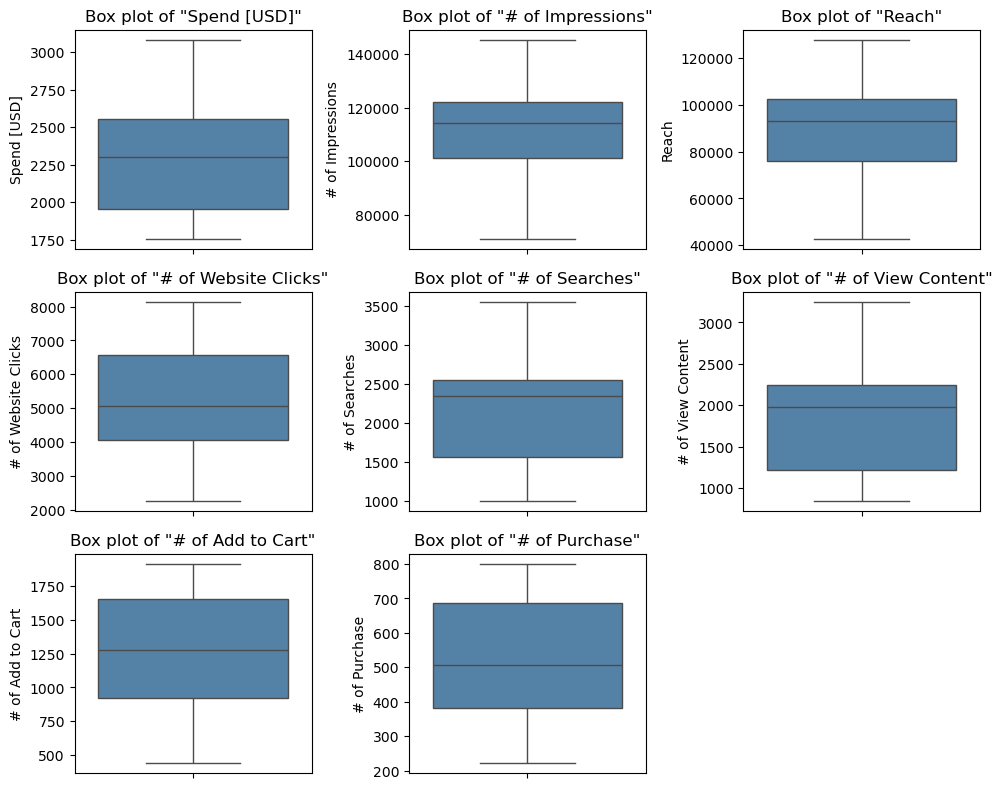

In [55]:
plt.figure(figsize=(10,8))
t = 1
for i in num_cols:
    plt.subplot(3,3,t) 
    sns.boxplot(filtered_control_df[i], color='steelblue')
    plt.title(f'Box plot of "{i}"')    
    t+=1
plt.tight_layout()
plt.show()

The distribution plots below illustrate the value distributions of the control variables before and after outlier removal.

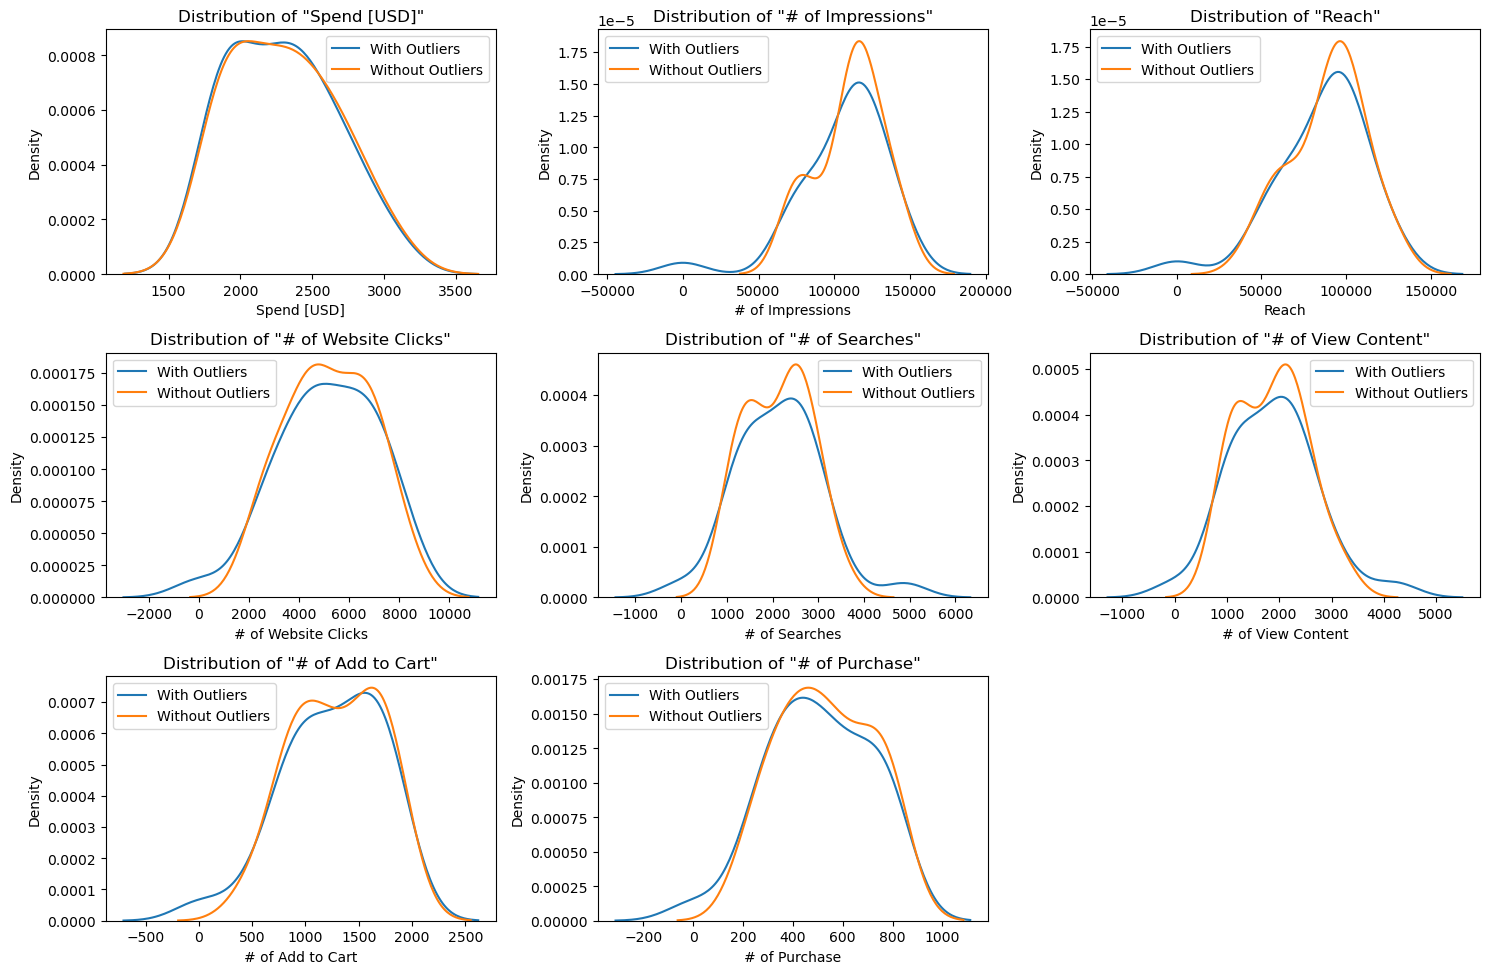

In [57]:
plt.figure(figsize=(15,10))
t = 1
for col in num_cols:
    plt.subplot(3,3,t)
    sns.kdeplot(control_df[col], label='With Outliers')
    sns.kdeplot(filtered_control_df[col], label='Without Outliers')
    plt.title(f'Distribution of "{col}"')
    plt.legend()
    t+=1
plt.tight_layout()
plt.show()

#### Test Group

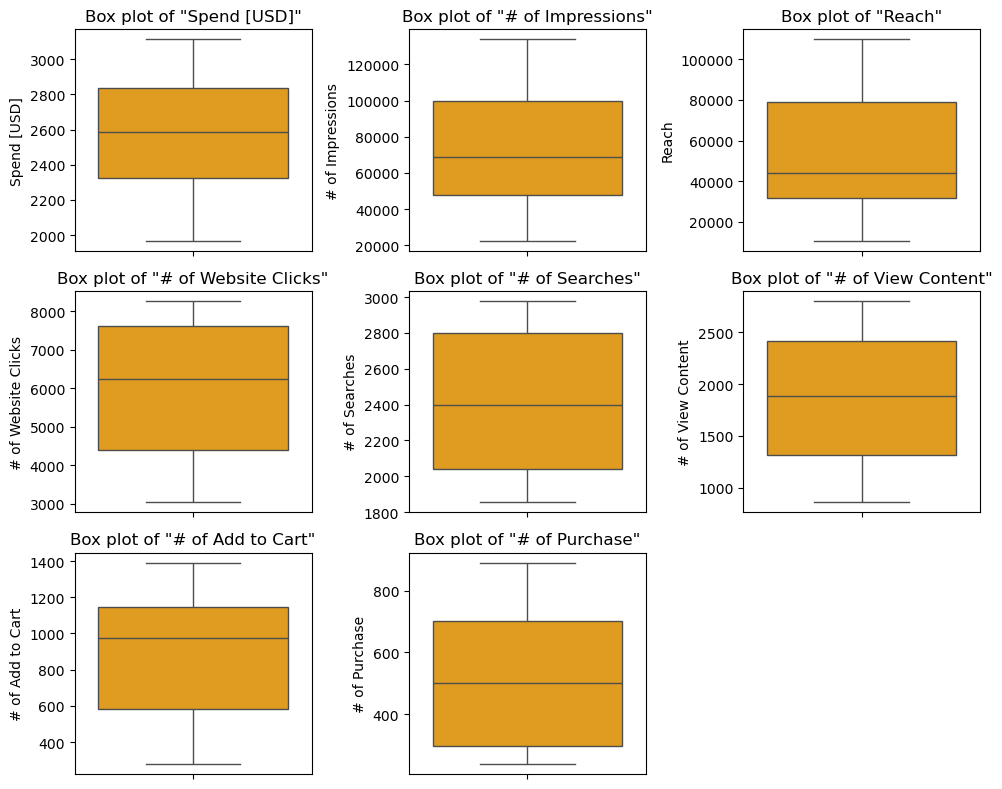

In [59]:
plt.figure(figsize=(10,8))
t = 1
for i in num_cols:
    plt.subplot(3,3,t) 
    sns.boxplot(test_df[i], color='orange')
    plt.title(f'Box plot of "{i}"')    
    t+=1
plt.tight_layout()
plt.show()

No outliers are observed in the box plots of the test group.

## Metrics

I am defining a set of metrics that will be used to evaluate the success of each campaign.

For instance, the conversion rate quantifies the proportion of visitors who complete a desired action—such as making a purchase—relative to the total number of visitors. It is calculated as the ratio of purchases to website clicks.

In [63]:
# Click Through Rate
filtered_control_df['Click Through Rate'] = filtered_control_df['# of Website Clicks'] / filtered_control_df['# of Impressions']
test_df['Click Through Rate'] = test_df['# of Website Clicks'] / test_df['# of Impressions']

# Conversion Rate
filtered_control_df['Conversion Rate'] = filtered_control_df['# of Purchase'] / filtered_control_df['# of Website Clicks']
test_df['Conversion Rate'] = test_df['# of Purchase'] / test_df['# of Website Clicks']

# Cost Per Click
filtered_control_df['Cost per Click'] = filtered_control_df['Spend [USD]'] / filtered_control_df['# of Website Clicks']
test_df['Cost per Click'] = test_df['Spend [USD]'] / test_df['# of Website Clicks']

# Cost Per Result (Cost Per Purchase)
filtered_control_df['Cost per Purchase'] = filtered_control_df['Spend [USD]'] / filtered_control_df['# of Purchase']
test_df['Cost per Purchase'] = test_df['Spend [USD]'] / test_df['# of Purchase']

#### Checking for normality of metric columns

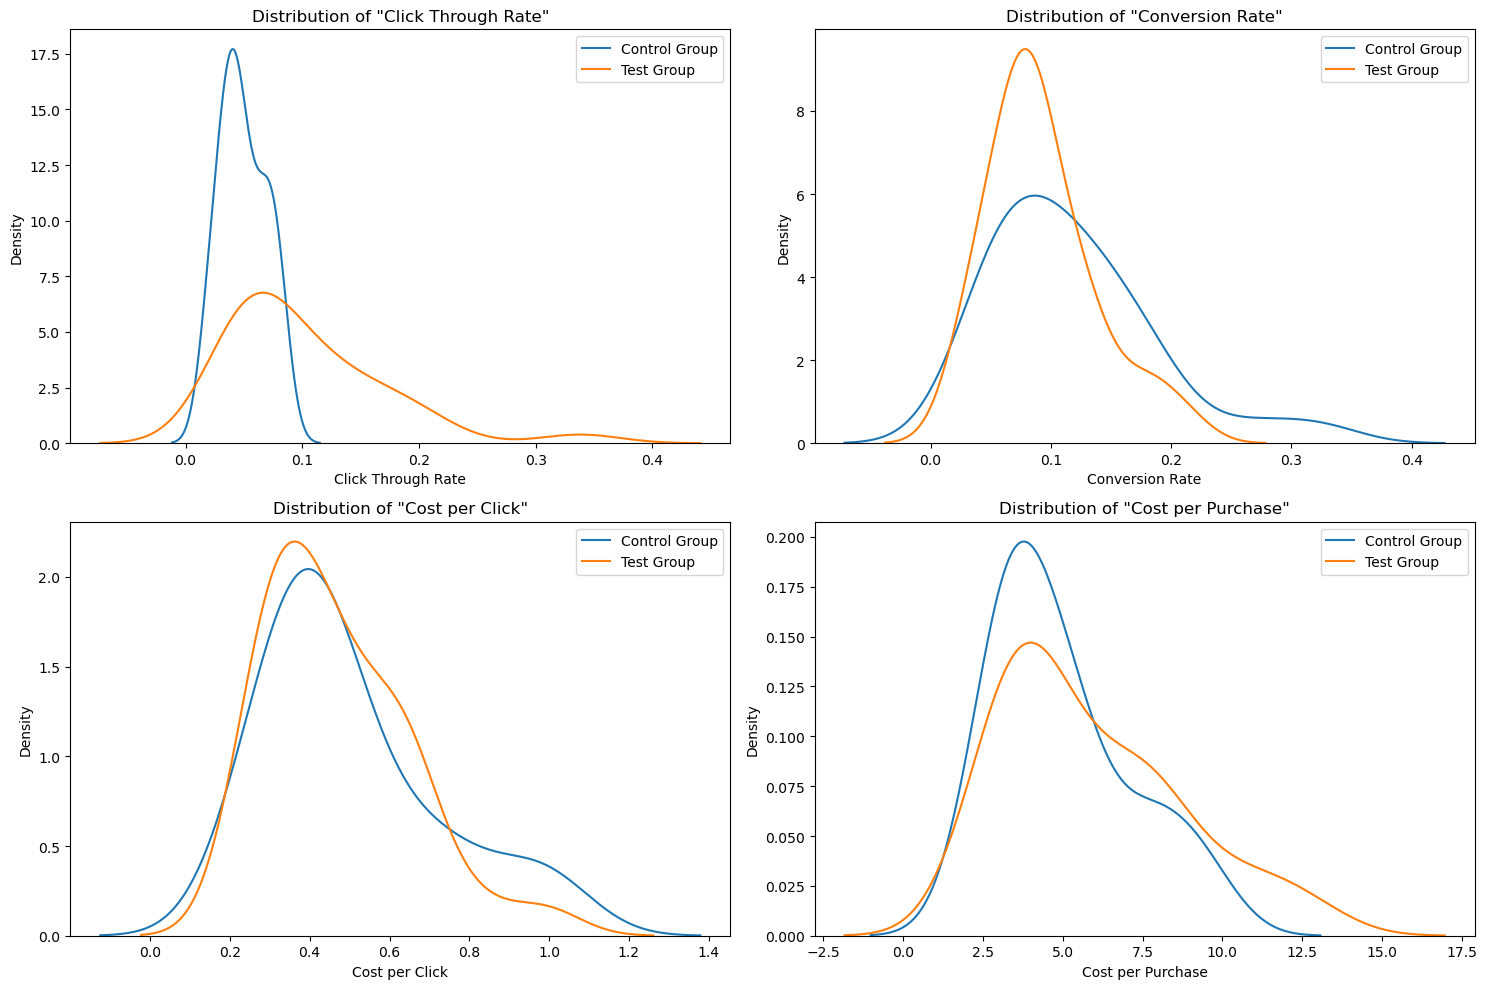

In [65]:
metrics = ['Click Through Rate', 'Conversion Rate', 'Cost per Click', 'Cost per Purchase']

plt.figure(figsize=(15,10))
t = 1
for col in metrics:
    plt.subplot(2,2,t)
    sns.kdeplot(filtered_control_df[col], label='Control Group', palette='steelblue')
    sns.kdeplot(test_df[col], label='Test Group', palette='orange')
    plt.title(f'Distribution of "{col}"')
    plt.legend()
    t+=1
plt.tight_layout()
plt.show()

The plots show that the metrics variables do not have normal distributions. Some of the distributions look skewed. This could be explained by the small number of data points in the campaign.

#### Shapiro test

The Shapiro-Wilk test is used to assess whether a dataset is normally distributed. It is sensitive to all types of deviations from normality. The test evaluates the null hypothesis that the data follows a normal distribution.

**Null hypothesis (H₀)**: The data is normally distributed.

**Alternative hypothesis (H₁)**: The data is not normally distributed.

If the p-value is less than or equal to 0.05, we reject the null hypothesis, indicating that the data significantly deviates from normality.

In [69]:
for metric in metrics:

    print(f'\n{metric}:')

    test_stat, pvalue = shapiro(filtered_control_df[metric])
    print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

    test_stat, pvalue = shapiro(test_df[metric])
    print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Click Through Rate:
Test Stat = 0.9543, p-value = 0.2531
Test Stat = 0.8409, p-value = 0.0004

Conversion Rate:
Test Stat = 0.8978, p-value = 0.0102
Test Stat = 0.9255, p-value = 0.0373

Cost per Click:
Test Stat = 0.8821, p-value = 0.0045
Test Stat = 0.9114, p-value = 0.0162

Cost per Purchase:
Test Stat = 0.9008, p-value = 0.0119
Test Stat = 0.8966, p-value = 0.0069


These tests—except for the one applied to the click-through rate—indicate that the distributions are not normally shaped, as their p-values are all below 0.05.

## Comparing the results of control and test groups

In [72]:
def metric_comparison_viz(metric):
    percentage_metrics = ['Click Through Rate', 'Conversion Rate']

    avg_control = filtered_control_df[metric].mean()
    avg_test = test_df[metric].mean()

    x = ['control group', 'test group']
    if metric in percentage_metrics:
        y = [avg_control * 100, avg_test * 100]
    else:
        y = [avg_control, avg_test]

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    sns.lineplot(data=filtered_control_df, x='Date', y=metric, label='control group', ax=ax1)
    ax1.axhline(y=avg_control, color='steelblue', ls='--', label='control group avg')

    sns.lineplot(data=test_df, x='Date', y=metric, label='test group', ax=ax1)
    ax1.axhline(y=avg_test, color='orange', ls='--', label='test group avg')

    ax1.legend()
    ax1.set_title(f'Daily {metric} during the Campaign')
    ax1.tick_params(axis='x', rotation=90)

    sns.barplot(x=x, y=y, palette=['steelblue', 'orange'], ax=ax2)

    for container in ax2.containers:
        fmt = '%.2f%%' if metric in percentage_metrics else '%.2f'
        ax2.bar_label(container, fmt=fmt, label_type='edge', fontsize=9)

    ax2.set_ylabel(f'Average {metric}')
    ax2.set_title(f'Average {metric} during the Campaign')

    plt.tight_layout()
    plt.show()

I am comparing both the daily values and the overall average values of the metrics between the test and control groups.

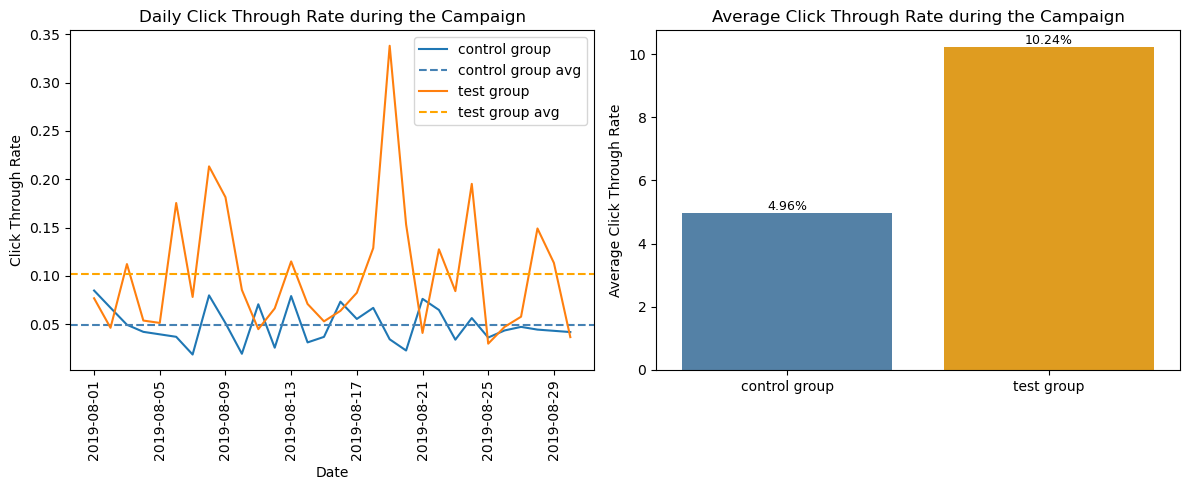

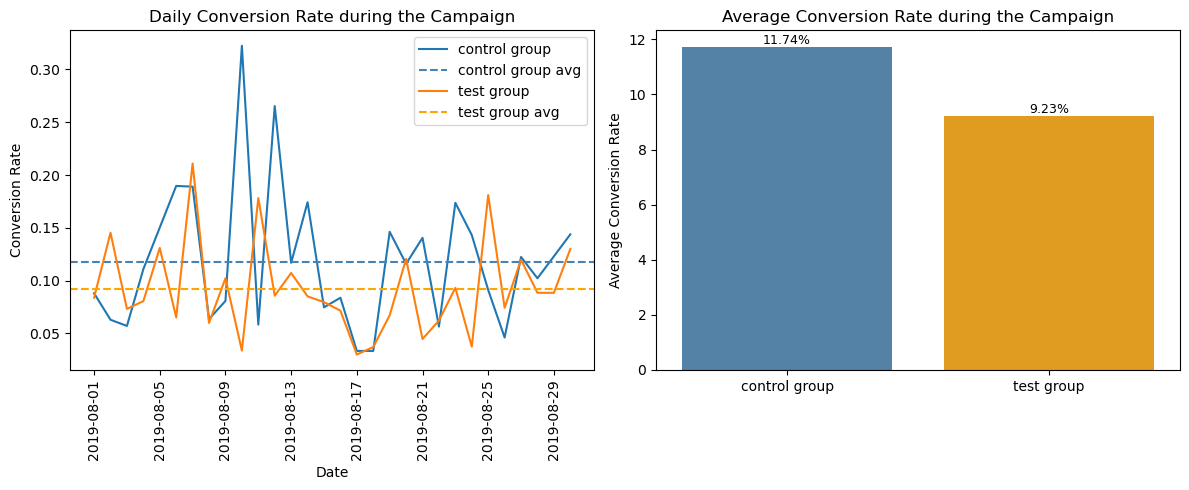

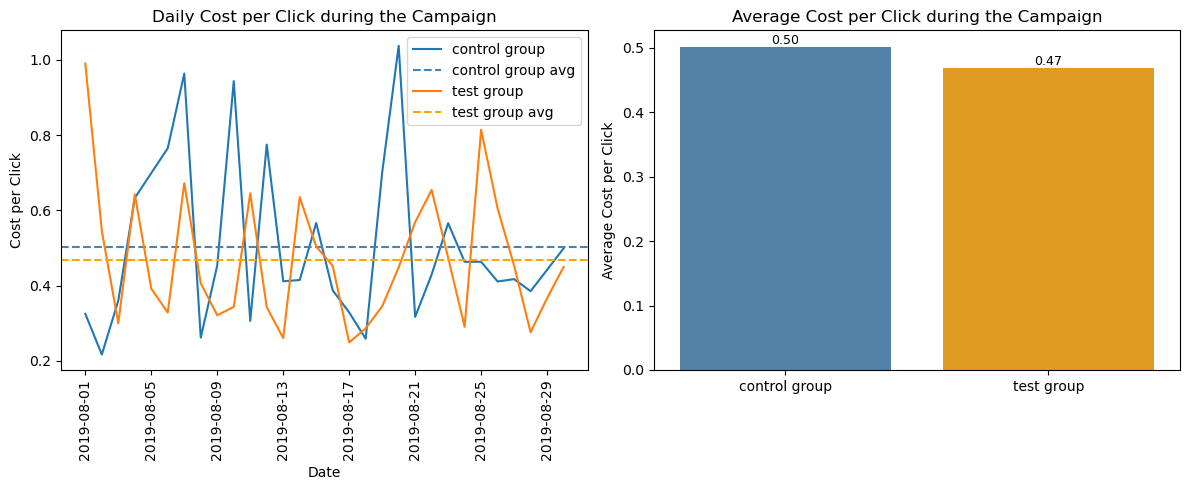

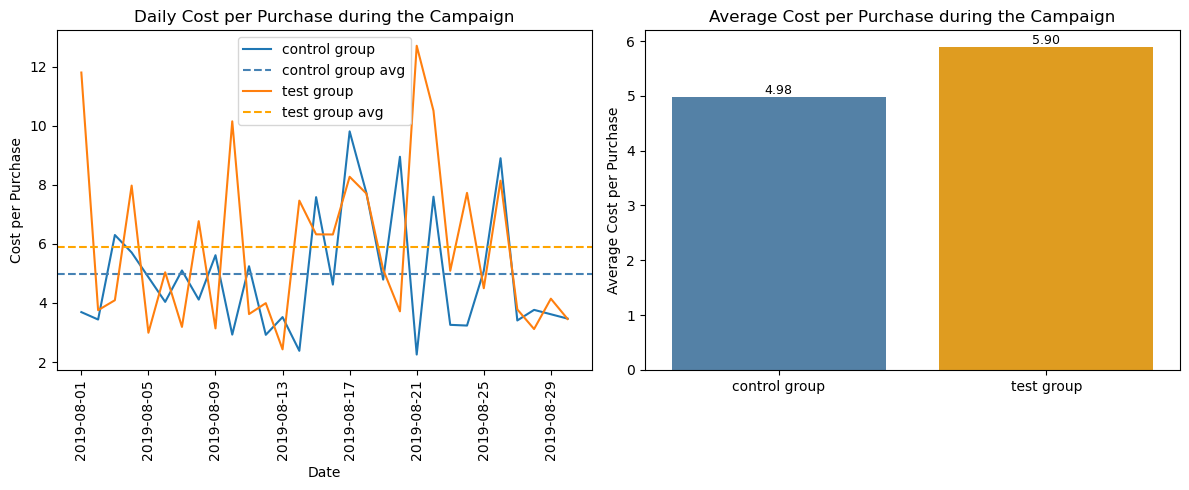

In [74]:
for metric in metrics:
    metric_comparison_viz(metric)

The Test Campaign (the new campaign) significantly outperformed the Control Campaign (the baseline) in attracting attention, achieving a much higher Click-Through Rate (10.24% vs. 4.96%) and a slightly lower Cost Per Click (0.47 USD vs. 0.50 USD). However, the Test Campaign proved less effective at converting those clicks into purchases, resulting in a lower Conversion Rate (9.23% vs. 11.74%) and a higher Cost Per Purchase (5.90 USD vs. 4.98 USD) compared to the Control Campaign.

####  Levene's test for Homogeneity of Variances

Levene’s test is used to assess the equality of variances across two or more groups. It tests the null hypothesis that the variances are equal.

**Null hypothesis (H₀)**: The variances of the groups are equal.

**Alternative hypothesis (H₁)**: At least one group has a significantly different variance.

If the p-value is less than 0.05, we reject the null hypothesis, indicating that the assumption of equal variances is violated.

In [78]:
for metric in metrics:
    levene_test = levene(filtered_control_df[metric], test_df[metric])
    print(f"\nLevene's Test for Homogeneity of Variances: {metric}")
    print(f"Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")


Levene's Test for Homogeneity of Variances: Click Through Rate
Statistic = 9.938599305698453, p-value = 0.0026003006411090416

Levene's Test for Homogeneity of Variances: Conversion Rate
Statistic = 3.3102851848423023, p-value = 0.07419480287654955

Levene's Test for Homogeneity of Variances: Cost per Click
Statistic = 0.30735579995268336, p-value = 0.5815147351477551

Levene's Test for Homogeneity of Variances: Cost per Purchase
Statistic = 1.7399012133302252, p-value = 0.1925197772263418


According to the results:

We fail to reject H₀ for conversion rate, cost per click, and cost per purchase, indicating **no statistically significant differences** between the groups for these metrics.

We reject H₀ for click-through rate, indicating a **statistically significant difference** between the control and test groups.

#### t-test

Given the small sample size and the skewed nature of the distributions under consideration, the t-test may lack robustness. This is because the Central Limit Theorem—which often justifies the use of the t-test for skewed variables—typically applies when sample sizes are sufficiently large.

However, before proceeding to more complex tests, I will first examine the t-test results to see if they align with those from Levene’s test.

**Null Hypothesis (H₀)**: There is no significant difference between the performance of the control group and the test group.

**Alternative Hypothesis (H₁)**: There is a significant difference between the performance of the control group and the test group.

In [82]:
for metric in metrics:

    print(f'\n{metric}:')
    t_stat, p_value = ttest_ind(filtered_control_df[metric], test_df[metric])
    print(f"T-statistic: {t_stat}, P-value: {p_value}")


Click Through Rate:
T-statistic: -3.9722861929198148, P-value: 0.00020545736559049221

Conversion Rate:
T-statistic: 1.6717099553710586, P-value: 0.10016095191704834

Cost per Click:
T-statistic: 0.6346799573036067, P-value: 0.52822174114737

Cost per Purchase:
T-statistic: -1.40447638039896, P-value: 0.1656994520649338


According to these results:

The differences in conversion rates, cost per click, and cost per purchase between the control and test groups are **not statistically significant**.

The difference in click-through rates between the control and test groups is **statistically significant**.

At the 95% confidence level, I fail to reject the null hypothesis for conversion rate, cost per click, and cost per purchase, but I reject the null hypothesis for click-through rates.

#### Test for Non-Normal Distributed Variables (Mann-Whitney U test)

This is the non-parametric equivalent of the independent t-test. It does not assume normality and is well-suited for small sample sizes.

**Null Hypothesis (H₀)**:
The distributions of the two independent groups are equal.

**Alternative Hypothesis (H₁)**:
The distributions of the two independent groups are not equal.

In [86]:
for metric in metrics:

    print(f'\n{metric}:')
    print(mannwhitneyu(filtered_control_df[metric], test_df[metric]))


Click Through Rate:
MannwhitneyuResult(statistic=175.0, pvalue=0.00014205949265144692)

Conversion Rate:
MannwhitneyuResult(statistic=499.0, pvalue=0.22189553147773622)

Cost per Click:
MannwhitneyuResult(statistic=445.0, pvalue=0.7030299918355747)

Cost per Purchase:
MannwhitneyuResult(statistic=342.0, pvalue=0.22783958084713474)


According to these results:

The differences in conversion rates, cost per click, and cost per purchase between the control and test groups are **not statistically significant**.

The difference in click-through rates between the control and test groups is **statistically significant**.

## Conclusion

In summary:

The differences in conversion rates, cost per click, and cost per purchase between the control and test groups are **not statistically significant**.

The difference in click-through rates between the control and test groups is **statistically significant**.

Therefore, the test campaign advertisement does not have a significant impact on conversion rate, cost per click, or cost per purchase. As a result, **there is no clear advantage to the new (test) campaign** based on these metrics.
